# Семинар 15

## Визуализация данных

Какие бывают типы данных?
- **численные**
  - дискретные: $2001, 2004, 2009, 2017$
  - непрерывные: $0.27, 10.3, 278.95, 9.54$

> Дискретные переменные — такие, значения которых обязательно находятся на определённых интервалах. Например, такая переменная, как «год», дискретна, потому что года бывают только целыми числами, и не может быть какого-нибудь $2017.5$ года. Число рублей может быть не целым, но и у него есть интервальные ограничения, потому что минимально возможным значением рубля будет $0.01$ (= 1 копейка), и на вашей банковской карточке не может быть, скажем, $750.0052$ рубля. А вот если речь про процент голосов за кандидата на выборах или массу тела — у таких переменных нет ограничений по каким-либо интервалам.

- **категориальные**
  - ранжированные: пн, вт, ср, чт, пт, сб, вс
  - неранжированные: арабский, персидский, английский, русский

_____

Самые распространённые типы диаграмм:

- столбчатая диаграмма (***bar plot***)
- гистограмма (***histogram***)
- точечная диаграмма (***scatter plot***)
- линейный график (***line plot***)
- тепловая карта (***heatmap***)
- ящик с усами (***box plot***)

Все их можно рисовать в питоне. Рассмотрим некоторые из них! Но сначала нам придётся пройти быстрый мини-курс по `pandas`.

## Быстрое введение в **`pandas`**

Библиотека **`pandas`** — очень известный и широко используемый инструмент для работы с **табличными данными**. Для построения диаграмм она нам будет очень полезна. Эту библиотеку принято импортировать под псевдонимом **`pd`**:

In [1]:
import pandas as pd

### Создание датафрейма

#### Датафрейм из словаря со списками

Основной класс объектов в `pandas` — **`pd.DataFrame`**, то есть **датафрейм**, или попросту таблица. Создать датафрейм можно разными способами, в том числе из словаря, в котором ключи — это будущие названия столбцов, а значения хранят будущие значения ячеек:

In [2]:
slovar = {
    "language": ["Arabic", "English", "Persian", "Russian"],
    "default_order": ["VSO", "SVO", "SOV", "SVO"]
}

In [3]:
slovar = pd.DataFrame(slovar)
slovar

,language,default_order
0,Arabic,VSO
1,English,SVO
2,Persian,SOV
3,Russian,SVO


Слева от первого столбца вы видите **индексы** ($0, 1, 2, 3$). Они в чём-то похожи на индексы списка (по умолчанию идут от $0$ до конца таблицы), а в чём-то — на ключи словаря (в теории могут быть не только числами от $0$ до конца таблицы, а вообще любыми числами или даже строками).

#### Датафрейм из списка со словарями

Датафрейм можно также сделать из списка со словарями. Ключи словарей должны быть одни и те же — это будут названия столбцов, а значения будут значениями ячеек.

Такой формат данных мы уже видели в 6 домашке. Вернёмся к тому [датасету](https://github.com/maxmerben/hse-python-iran-2024/blob/main/other/sem6.2-poems.json) с персидскими поэмами и загрузим его:

In [4]:
import json
with open("sem6.2-poems.json", "r", encoding="utf-8-sig") as f:
    poems = json.load(f)

In [5]:
poems[0:2]

[{'author': 'Xāqāni',
  'century': 6,
  'text': 'آفاق به پای آه ما فرسنگی است    وز نالهٔ ما سپهر دود آهنگی است    بر پای امید ماست هر جا خاری است    بر شیشهٔ عمر ماست هر جا سنگی است'},
 {'author': 'Xayyām',
  'century': 6,
  'text': '* ساقی غمِ من بلند\u200cآوازه شده\u200cاست،    سرمستیِ من برون ز اندازه شده\u200cاست؛    با مویِ سپیدْ سرخوشم کز میِ تو؛    پیرانه\u200cسرم بهارِ دل تازه شده\u200cاست.'}]

Сделаем из него датафрейм:

In [6]:
poems = pd.DataFrame(poems)
poems

,author,century,text
0,Xāqāni,6,آفاق به پای آه ما فرسنگی است وز نالهٔ ما سپ...
1,Xayyām,6,* ساقی غمِ من بلند‌آوازه شده‌است، سرمستیِ م...
2,Hāfez,8,ای که در کشتن ما هیچ مدارا نکنی سود و سرمای...
3,Hāfez,8,ای که بر ماه از خط مشکین نقاب انداختی لطف ک...
4,Xayyām,6,ای دوست بیا تا غم فردا نخوریم وین یکدم عمر ...
...,...,...,...
295,Xayyām,6,عمریست مرا تیره و کاریست نه راست محنت همه ا...
296,Hāfez,8,ناگهان پرده برانداخته‌ای یعنی چه مست از خان...
297,Xāqāni,6,طبع تو دمساز نیست چاره چه سازم کین تو کمتر ...
298,Xāqāni,6,شاهد سرمست من صبح درآمد ز خواب کرد صراحی طل...


#### Датафрейм из _csv_-таблицы

Самый каноничный способ создания датафрейма — загрузка данных из *csv*-файла. Для этого используется функция **`pd.read_csv()`**, в которую подаётся название файла (файл должен лежать в той же папке, где тетрадка). Функция `open`, кодировки и вся возня со структурой *csv* вообще не нужны, `pandas` делает всё за нас.

В датасете ниже (**[ссылка](https://github.com/maxmerben/hse-python-iran-2024/blob/main/other/sem15-temperature.csv)**, [исходные данные](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data)) собраны средние замеры температуры летом с 1850 по 2013 годы в некоторых городах Земли:

In [7]:
filename = "sem15-temperature.csv"

temp = pd.read_csv(filename)
temp

,year,city,temp
0,1850,Baghdad,33.436000
1,1850,Calcutta,29.244000
2,1850,Delhi,31.568333
3,1850,Mashhad,23.158000
4,1850,Moscow,18.205333
...,...,...,...
802,2013,Baghdad,35.219333
803,2013,Calcutta,30.052333
804,2013,Delhi,31.339667
805,2013,Mashhad,25.448000


### Работа с датафреймами

Рассмотрим несколько ключевых возможностей в работе с датафреймами `pandas`.

Вывести только верх таблицы — **`df.head()`**:

In [8]:
temp.head()

,year,city,temp
0,1850,Baghdad,33.436000
1,1850,Calcutta,29.244000
2,1850,Delhi,31.568333
3,1850,Mashhad,23.158000
4,1850,Moscow,18.205333


В `df.head()` можно подать число строк, которое вы хотите видеть (по умолчанию 5):

In [9]:
temp.head(2)

,year,city,temp
0,1850,Baghdad,33.436
1,1850,Calcutta,29.244


_____

Получить число строк можно обычной функцией `len()`:

In [10]:
len(temp)

807

Но есть и специализированный способ, который даёт больше информации. Можно запросить у датафрейма атрибут **`df.shape`**, который вернёт кортеж вида: (**кол-во строк, кол-во столбцов**). (Напомним: атрибут — свойство объекта, которое запрашивается как метод, но без скобок.)

In [11]:
print(temp.shape)
print("кол-во строк:    ", temp.shape[0])
print("кол-во столбцов: ", temp.shape[1])

(807, 3)
кол-во строк:     807
кол-во столбцов:  3


_____

Из датафрейма можно **вытащить отдельный столбец**. Для этого надо запросить столбец по названию так, как будто это ключ словаря:

In [12]:
temp["city"]

0       Baghdad
1      Calcutta
2         Delhi
3       Mashhad
4        Moscow
         ...   
802     Baghdad
803    Calcutta
804       Delhi
805     Mashhad
806      Moscow
Name: city, Length: 807, dtype: object

В результате этого `pandas` выдаёт объект **`Series`**. По сути это просто столбец датафрейма. У него, как видите, сохраняются индексы — поэтому из `Series` можно добраться до значения конкретной ячейки, используя индексацию:

In [13]:
print(temp["city"][0])
print(temp["year"][0])

print(temp["city"][804])
print(temp["year"][804])

Baghdad
1850
Delhi
2013


_____

От объекта `Series` можно вызвать метод **`.unique()`**, который будет выдавать все уникальные значения этого столбца датафрейма. (В результате получается объект `np.ndarray` (англ. *array* ‘массив’) из библиотеки `numpy`. Не суть важно, что это за объект, де-факто это улучшенная версия списка. Мы можем для простоты считать, что это список.)

In [18]:
unique_cities = temp["city"].unique()

print(unique_cities)
print(type(unique_cities))

print(unique_cities[2])

['Baghdad' 'Calcutta' 'Delhi' 'Mashhad' 'Moscow']
<class 'numpy.ndarray'>
Delhi


Есть также метод **`.value_counts()`**, который не просто находит уникальные значения, но ещё и подсчитывает количество их употреблений:

In [19]:
counts = temp["city"].value_counts()
counts

city
Baghdad     164
Mashhad     164
Moscow      164
Calcutta    163
Delhi       152
Name: count, dtype: int64

_____

Данные датафрейма можно **отфильтровать** по некоторому условию. Это условие (в виде логического выражения) нужно записать в квадратные скобки. В логическом выражении должны сравниваться один из столбцов и какое-то значение (число, строка, другой столбец и так далее). В сравнении можно использовать привычные нам операторы `==`, `!=`, `>`, `<`, `>=`, `<=`. Например, выберем только строки с данными из Мешхеда:

In [14]:
temp[temp["city"] == "Mashhad"]

,year,city,temp
3,1850,Mashhad,23.158000
8,1851,Mashhad,23.634667
13,1852,Mashhad,23.391333
18,1853,Mashhad,23.652667
23,1854,Mashhad,22.687333
...,...,...,...
785,2009,Mashhad,24.794333
790,2010,Mashhad,25.727667
795,2011,Mashhad,25.946667
800,2012,Mashhad,24.990667


В результате получается новый датафрейм, который можно записать в переменную:

In [15]:
temp_filtered = temp[temp["year"] > 2000]

print(temp_filtered["year"].unique())

temp_filtered.head(3)

[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013]


,year,city,temp
742,2001,Baghdad,36.098333
743,2001,Calcutta,29.220333
744,2001,Delhi,31.196667


При фильтрации нельзя использовать оператор `in`, но можно вызвать от столбца датафрейма (`Series`) метод **`.isin()`**, который делает то же самое:

In [16]:
temp[temp["city"] in ["Calcutta", "Delhi"]]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [17]:
temp[temp["city"].isin(["Calcutta", "Delhi"])]

,year,city,temp
1,1850,Calcutta,29.244000
2,1850,Delhi,31.568333
6,1851,Calcutta,29.221333
7,1851,Delhi,31.361333
11,1852,Calcutta,28.947000
...,...,...,...
794,2011,Delhi,31.329667
798,2012,Calcutta,30.467000
799,2012,Delhi,32.873333
803,2013,Calcutta,30.052333


_____

Датафрейм можно не только открыть из *csv*-файла, но и **сохранить в *csv*-файл**. Для этого используется метод **`df.to_csv()`** — его нужно вызвать от датафрейма и подать в него название файла, в который надо сохранить данные. Ещё можно подать аргумент `index`, который указывает, надо ли сохранять индекс в отдельный столбец (по умолчанию `index=True`, то есть индекс сохраняется):

In [20]:
slovar

,language,default_order
0,Arabic,VSO
1,English,SVO
2,Persian,SOV
3,Russian,SVO


In [21]:
slovar.to_csv("slovar.csv", index=False)

_____

> Мы рассмотрели только самые основы работы с `pandas`. Эта библиотека представляет из себя мощный инструмент, необходимый всем, кто работает с табличными данными. Если вы будете использовать питон для исследований или любых других дел по окончанию этого курса, очень рекомендую вам побольше узнать о ней и попрактиковаться — это сохранит вам много времени и сил в такой работе. Вот два милых гайда, которые вам помогут:
> - **[гайд №1](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners)** (много важных продвинутых вещей на одной странице)
> - **[гайд №2](https://www.kaggle.com/learn/pandas)** (мини-самоучитель с простыми заданиями для тренировки)

## Библиотека **`matplotlib`**

Рассмотрим некоторые инструменты для построения диаграмм из библиотеки **`matplotlib`**. Это огромная библиотека, которая позволяет очень мощно кастомизировать диаграммы. Она не так проста в использовании, но нам важно понимать её основы, потому что это дефолтный способ строить диаграммы в питоне. (Кроме того, альтернативные библиотеки для построения диаграмм пользуются `matplotlib` как внутренним движком, и для них тоже важно знать синтаксис `matplotlib`. Например, так работает более простая и гибкая в использовании библиотека `seaborn`.)

Импортируем подмодуль `matplotlib.pyplot` (будем использовать традиционный псевдоним `plt`):

In [22]:
import matplotlib.pyplot as plt

### Столбчатая диаграмма (*bar plot*)

Прототипическое использование барплота:
- ось X: **категориальная переменная**
- ось Y: **численная переменная**

Для построения барплота используется функция **`plt.bar()`**. В неё подаются два обязательных аргумента: `x` (значения категориальной переменной, которую мы хотим расположить на оси X) и `height` (численные значения, соответствующие каждой из категорий). В качестве этих аргументов подойдут любые одномерные итерируемые наборы данных (списки, кортежи, столбцы датафреймов и так далее).

После объявления диаграммы принято писать специальную функцию **`plt.show()`**, чтобы вывести её на экран. Но в Jupyter Notebook эту функцию можно и не писать — диаграмма всё равно показывается. Я бы рекомендовал приучиться всегда её использовать, но если вдруг забудется, ничего страшного. (Техническое объяснение того, зачем функция `plt.show()` вообще нужна, можно прочитать [вот здесь](https://stackoverflow.com/questions/66379699/i-dont-understand-what-plt-show-does).)

Построим диаграмму, показывающую, сколько иранист:ок пришли на пару 7 марта 2025 года, а сколько не пришли:

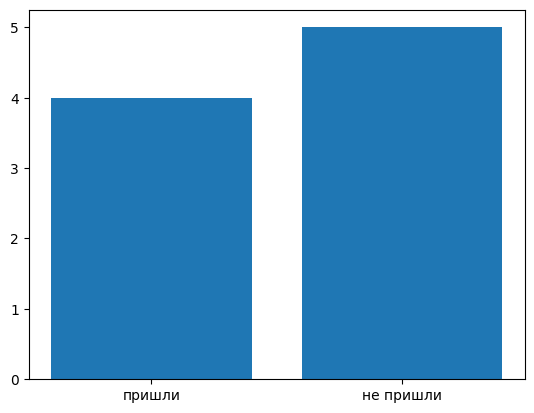

In [23]:
plt.bar(x=["пришли", "не пришли"], height=[4, 5])
plt.show()

В `plt.bar` можно подать много разных дополнительно аргументов. Например, с помощью `width` можно изменить дефолтную ширину столбцов:

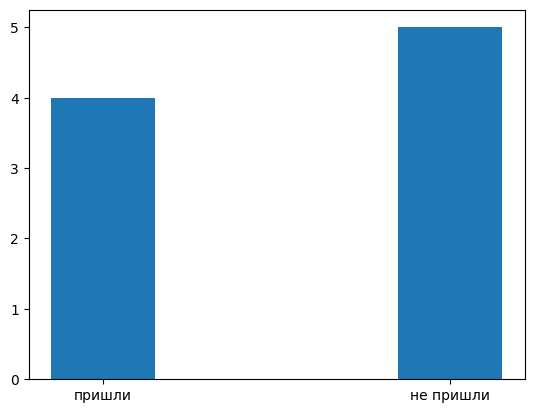

In [24]:
plt.bar(x=["пришли", "не пришли"], height=[4, 5], width=0.3)   # ширина = 0.3 от дефолтной
plt.show()

До и после объявления диаграммы функцией `plt.bar()` можно объявить ещё несколько вещей. До — отрегулировать параметры всей диаграммы с помощью функции **`plt.figure()`**. Например, в её аргумент `figsize` можно подать кортеж/список вида *(ширина, высота)* (измерямые в дюймах):

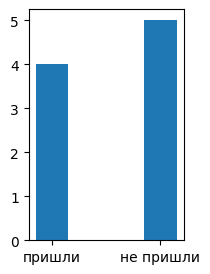

In [26]:
plt.figure(figsize=(2, 3))   # ширина диаграммы = 2 дюйма, высота = 3 дюйма

plt.bar(x=["пришли", "не пришли"], height=[4, 5], width=0.3)
plt.show()

После объявления диаграммы можно добавить к диаграмме название (`plt.title`), а также названия для оси X (`plt.xlabel`) и оси Y (`plt.ylabel`). Важно, чтобы `plt.show()` при этом оставалась в самом конце!

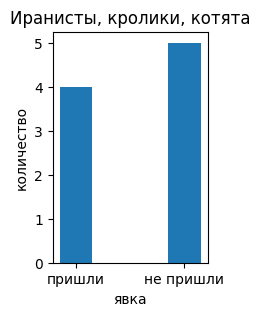

In [27]:
plt.figure(figsize=(2, 3))

plt.bar(x=["пришли", "не пришли"], height=[4, 5], width=0.3)
plt.title("Иранисты, кролики, котята")   # название диаграммы
plt.xlabel("явка")                       # название оси X
plt.ylabel("количество")                 # название оси Y

plt.show()

_____

Вот ещё пара примеров. Возьмём таблицу `poems` (с данными мини-корпуса персидской поэзии) и посчитаем `.value_counts()` по авторам. В получившемся объекте `Series` сами авторы являются индексами (их можно достать, например, атрибутом `.index`). Подадим авторов на ось X, а количество их поэм в корпусе — на ось Y:

In [34]:
authors = poems["author"].value_counts().index
print(authors)

values = poems["author"].value_counts()
print(values)

Index(['Xāqāni', 'Hāfez', 'Rudaki', 'Xayyām', 'Šahriyār', 'Asadi Tusi'], dtype='object', name='author')
author
Xāqāni        137
Hāfez          53
Rudaki         45
Xayyām         36
Šahriyār       16
Asadi Tusi     13
Name: count, dtype: int64


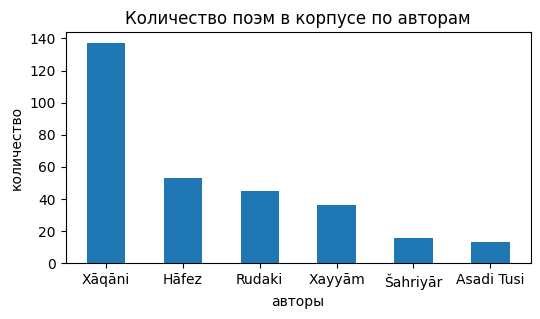

In [35]:
plt.figure(figsize=(6, 3))

plt.bar(x=authors, height=values, width=0.5)
plt.title("Количество поэм в корпусе по авторам")
plt.xlabel("авторы")
plt.ylabel("количество")

plt.show()

____

Ось Y на барплоте может показывать не только количество объектов, но и любые численные данные. Например, давайте отфильтруем датасет с ежегодными замерами температуры по одному году (допустим, 1900-му) и подадим в барплот список городов и их средние летние температуры:

In [36]:
temp = pd.read_csv("sem15-temperature.csv")

temp_1900 = temp[temp["year"] == 1900]
temp_1900

,year,city,temp
237,1900,Baghdad,33.112333
238,1900,Calcutta,29.421667
239,1900,Delhi,32.580000
240,1900,Mashhad,22.853667
241,1900,Moscow,16.316333


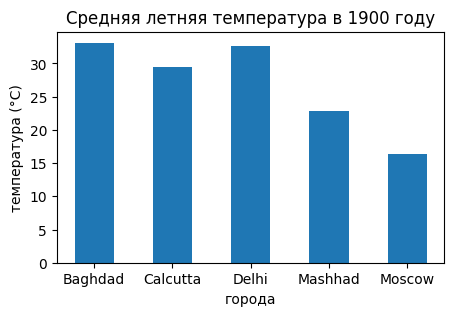

In [37]:
plt.figure(figsize=(5, 3))

plt.bar(x=temp_1900["city"], height=temp_1900["temp"], width=0.5)
plt.title("Средняя летняя температура в 1900 году")
plt.xlabel("города")
plt.ylabel("температура (°C)")

plt.show()

### Гистограмма (*histogram*)

**Гистограмма** показывает распределение непрерывной переменной по оси X. Если вы не знаете или забыли, что такое гистограмма и как она работает, рекомендую посмотреть **[вот это видео](https://youtu.be/c02vjunQsJM?si=uLU0R-dxiPSG27G2)** — или пробежаться по примерам ниже.

Прототипическое использование гистограммы:
- ось X: **непрерывная численная переменная**
- ось Y: **количество данных** (т. е. численная переменная)

Давайте загрузим данные о результатах парламентских выборов 2021 года по городу Саратову по избирательным комиссиям (**[ссылка](https://github.com/maxmerben/hse-python-iran-2024/blob/main/other/sem15-saratov2021_elections.csv)**) и построим по ним гистограммы.

In [38]:
elections = pd.read_csv("sem15-saratov2021_elections.csv")

In [39]:
elections.head()

,УИК,ТИК,избирателей в списках,действительных бюллетеней,КПРФ,Зеленые,ЛДПР,Новые Люди,Единая Россия,Справедливая Россия,...,РПСС,Коммунисты России,Гражданская платформа,Зеленая Альтернатива,Родина,Партия пенсионеров,явка,процент ЕР,сумма не-ЕР,процент не-ЕР
0,1,Волжский,2026,666,206,16,43,50,219,51,...,7,10,3,6,10,13,32.872655,32.882883,447,67.117117
1,4,Волжский,1067,383,113,11,15,20,133,35,...,7,2,0,8,5,13,35.895033,34.725849,250,65.274151
2,5,Волжский,1623,606,182,11,34,32,224,52,...,13,9,0,2,6,13,37.338262,36.963696,382,63.036304
3,6,Волжский,2277,1037,262,21,50,57,475,62,...,8,9,2,13,5,29,45.542380,45.805207,562,54.194793
4,7,Волжский,1326,567,148,12,22,28,229,51,...,9,11,2,8,7,13,42.760181,40.388007,338,59.611993


Гистограмма строится с помощью функции **`plt.hist()`**. В неё подаётся один аргумент, `x`. Подадим туда один из столбцов датафрейма — например, расположим на оси X явку (процент избиратель:ниц, которые пришли на выборы, от всех потенциальных избиратель:ниц):

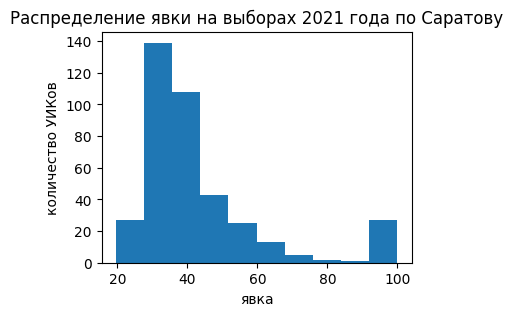

In [43]:
plt.figure(figsize=(4, 3))

plt.hist(x=elections["явка"])
plt.title("Распределение явки на выборах 2021 года по Саратову")
plt.xlabel("явка")
plt.ylabel("количество УИКов")

plt.show()

Получилась гистограмма, которую надо читать так:
- если разделить весь числовой ряд, на котором есть значения явки, на 10 равных интервалов,
- то окажется, что в первом интервале $≈25$ УИКов, во втором — $≈138$, и так далее.

При этом мы видим, что ось X начинается не с $0$, а с $20$ — потому что в датасете не оказалось УИКов, в которых явка была бы меньше $20 \%$. Если мы хотим это исправить, можно указать границы оси эксплицитно — с помощью функции **`plt.xlim()`** (или **`plt.ylim()`** для оси Y).

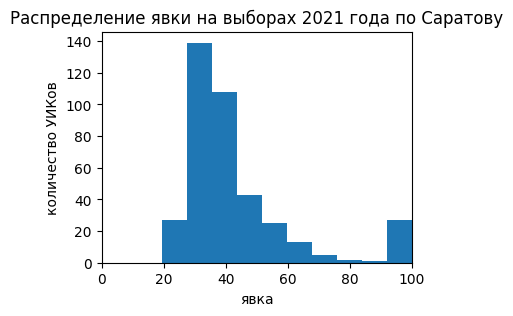

In [42]:
plt.figure(figsize=(4, 3))

plt.hist(x=elections["явка"])
plt.title("Распределение явки на выборах 2021 года по Саратову")
plt.xlabel("явка")
plt.ylabel("количество УИКов")
plt.xlim(0, 100)                 # ось X будет ограничена значениями 0 и 100

plt.show()

По умолчанию гистограмма состоит из десяти интервалов (англ. ***bins***, буквально ‘**корзинки**’), но мы можем сами выбрать нужное количество с помощью аргумента `bins` при построении гистограммы. Если выбрать большее число *bins*, то каждая конкретная «корзинка» будет захватывать более узкий интервал, а значит, и в высоту будет меньше:

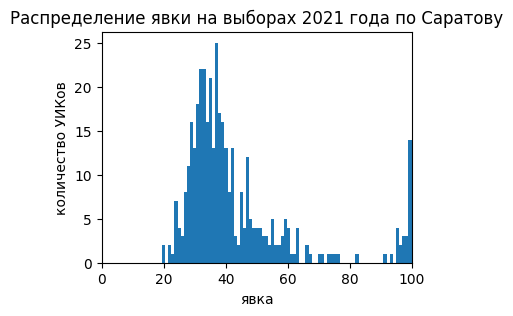

In [44]:
plt.figure(figsize=(4, 3))

plt.hist(x=elections["явка"], bins=80)
plt.title("Распределение явки на выборах 2021 года по Саратову")
plt.xlabel("явка")
plt.ylabel("количество УИКов")
plt.xlim(0, 100)

plt.show()

Наоборот, если выбрать маленькое число корзинок, то они станут толстыми, и каждая из них будет захватывать очень много данных. Слишком большие и слишком маленькие значения `bins` делают гистограмму малоинформативной — надо подбирать золотую середину (обычно это 10–20 корзинок, в зависимости от данных):

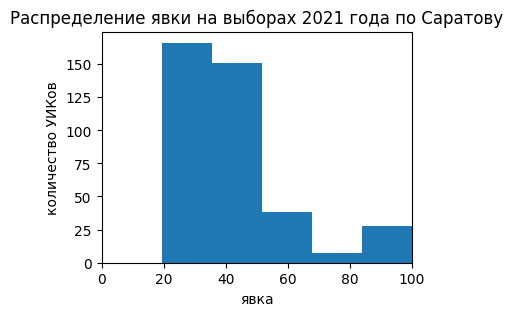

In [45]:
plt.figure(figsize=(4, 3))

plt.hist(x=elections["явка"], bins=5)
plt.title("Распределение явки на выборах 2021 года по Саратову")
plt.xlabel("явка")
plt.ylabel("количество УИКов")
plt.xlim(0, 100)

plt.show()

_____

**Обратите внимание на отличия гистограммы от барплота!**

* У гистограммы на оси X — (обычно непрерывная) численная переменная, а у барплота — категориальная.
* В гистограмму подаётся только одна переменная (на ось X), а ось Y высчитывается автоматически согласно тому, как разные строки данных попадают в интервалы-корзинки. В барплот подаются уже готовые значения оси Y, соответствующие значениям оси X. Поэтому в гистограмме ось Y может показывать только количество данных, а в барплоте — любые численные данные (например, по оси X могут быть города, а по оси Y — температура в них).

### Точечная диаграмма (*scatter plot*)

Прототипическое использование скаттерплота:
- ось X: **непрерывная численная переменная**
- ось Y: **непрерывная численная переменная**

Построим точечную диаграмму, которая будет показывать среднюю летнюю температуру в Мешхеде за последние полтора века. По оси X будет год (слева направо), а по оси Y — температура. Сначала отфильтруем все данные по Мешхеду, а потом подадим в функцию **`plt.scatter()`** соответствующие столбцы из отфильтованного датафрейма:

In [46]:
temp_mashhad = temp[temp["city"] == "Mashhad"]
temp_mashhad.head()

,year,city,temp
3,1850,Mashhad,23.158000
8,1851,Mashhad,23.634667
13,1852,Mashhad,23.391333
18,1853,Mashhad,23.652667
23,1854,Mashhad,22.687333


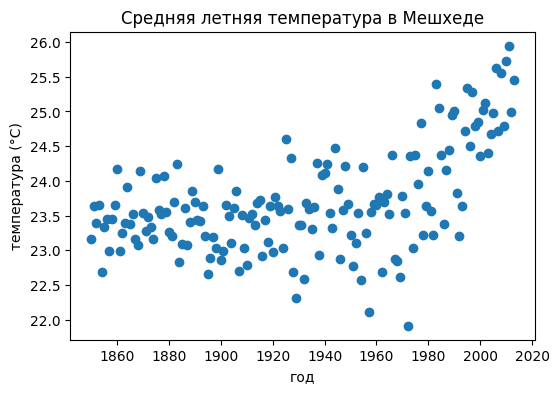

In [47]:
plt.figure(figsize=(6, 4))

plt.scatter(x=temp_mashhad["year"], y=temp_mashhad["temp"])
plt.title("Средняя летняя температура в Мешхеде")
plt.xlabel("год")
plt.ylabel("температура (°C)")

plt.show()

Все эти диаграммы можно **сохранять на компьютер как изображения** привычных форматов (*jpeg*, *png* и прочие). Делается это функцией **`plt.savefig()`**. В неё нужно подать название будущего файла, а также — опционально — разрешение картинки в виде числа DPI (*dots per inch*, то есть ‘пикселей на дюйм’). Это значение будет определять качество сохраняемой картинки (обычно 200–300 DPI хватает для чёткого качества; дефолтное значение может давать слегка шакальную картинку).

Функция `plt.savefig()` должна располагаться после всех украшений диаграммы, но обязательно перед `plt.show()`. Изображение появится тут же, в той папке, где находится тетрадка:

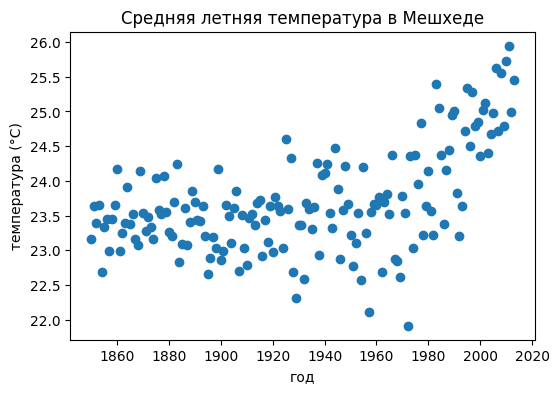

In [48]:
plt.figure(figsize=(6, 4))

plt.scatter(x=temp_mashhad["year"], y=temp_mashhad["temp"])
plt.title("Средняя летняя температура в Мешхеде")
plt.xlabel("год")
plt.ylabel("температура (°C)")

plt.savefig("mashhad-temp.png", dpi=300)
plt.show()

## Дополнительные материалы: **`seaborn`**

Выше мы обсуждали только самую дефолтную и немного громоздкую библиотеку для визуализации, `matplotlib`. В этих дополнительных материалах я немного похвастаюсь возможностями другой популярной библиотеки, **`seaborn`**. Она опирается на `matplotlib` как на внутренний движок и использует её функции, но заменяет его во многих аспектах, в которых тот слишком неудобен. Рассмотрите примеры ниже и оцените простоту и интуитивность синтаксиса. Если они вдохновят вас изучить основы `seaborn` самостоятельно (это несложно!), вот несколько ссылок, которые вам помогут:

- **[введение в `seaborn`](https://seaborn.pydata.org/tutorial/introduction.html)**
- **[примеры диаграмм в `seaborn`](https://seaborn.pydata.org/examples/index.html)**

In [49]:
import seaborn as sns

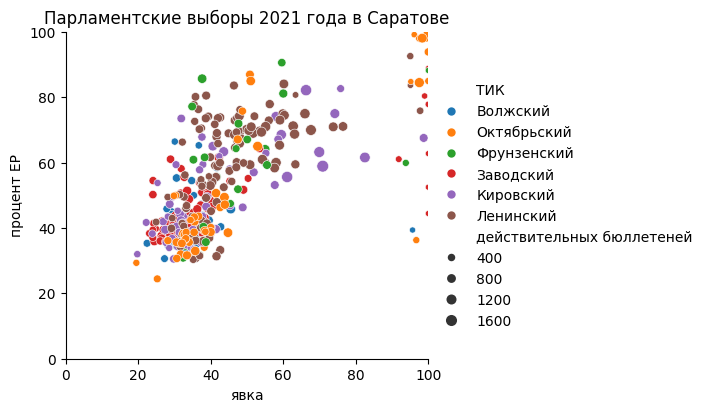

In [59]:
sns.relplot(
    data=elections,
    x="явка", y="процент ЕР",
    hue="ТИК",                          # цвет (hue) точки будет зависеть от переменной «ТИК»
    size="действительных бюллетеней",   # размер точки будет зависеть от переменной «действ…»
    height=4,                           # высота диаграммы = 4 дюйма
    aspect=1.2                          # отношение ширины диаграммы к высоте
)

plt.title("Парламентские выборы 2021 года в Саратове")
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.show()

_____

Второй пример — из датасета с данными о физиологических особенностях некоторых подвидов пингвинчиков (длина клюва, «глубина» клюва, длина крыла, масса тела и пол). (Кстати, зацените, в `seaborn` есть встроенные датасеты, на которых можно упражняться в визуализации; их можно загрузить прямо из питона функцией `load_dataset()`.)

In [51]:
penguins = sns.load_dataset("penguins")

In [52]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


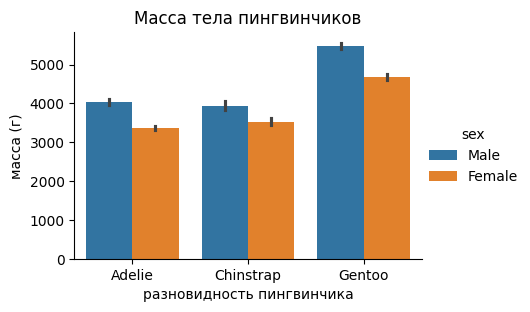

In [58]:
sns.catplot(
    data=penguins,
    x="species", y="body_mass_g",
    kind="bar",     # тип диаграммы (bar plot)
    hue="sex",      # группировка, показанная цветом (hue)
    height=3,       # высота диаграммы = 3 дюйма
    aspect=1.5      # отношение ширины диаграммы к высоте
)
plt.title("Масса тела пингвинчиков")
plt.xlabel("разновидность пингвинчика")
plt.ylabel("масса (г)")

plt.show()

_____

Ещё один потрясающий тип визуализации, который может легко сделать `seaborn`, — это тепловая карта, или **хитмэп** (а в `matplotlib`, кстати, его сделать очень трудно). Хитмэп используется, когда нужно показать сетку из двух категориальных переменных, на пересечениях которых находятся числа. Эти числа будут наглядно показываться цветом — чем больше значение, тем «теплее» цвет. Например, можно сделать нечто подобное:

In [56]:
students = pd.DataFrame({
    "антични:цы":  {"мальчики": 3, "девочки": 8},
    "библеист:ки": {"мальчики": 6, "девочки": 6},
    "индолог:ини": {"мальчики": 4, "девочки": 5},
    "иранист:ки":  {"мальчики": 2, "девочки": 6}
})
students

,антични:цы,библеист:ки,индолог:ини,иранист:ки
мальчики,3,6,4,2
девочки,8,6,5,6


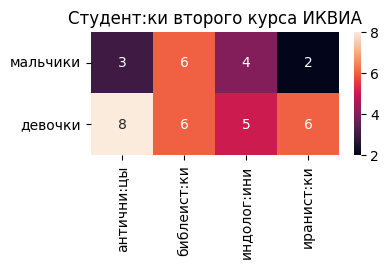

In [57]:
plt.figure(figsize=(4, 1.6))

sns.heatmap(students, annot=True)
plt.title("Студент:ки второго курса ИКВИА")

plt.show()